In [23]:
# %% [markdown]
# # Machine Learning Pipeline for Diseases and Symptoms Dataset
# 
# This notebook implements a complete ML pipeline for solving a classification problem using the Diseases and Symptoms Dataset from Kaggle.
# 
# The pipeline includes:
# 1. Dataset loading & exploratory data analysis (EDA)
# 2. Data preprocessing:
#    - Data cleaning
#    - Missing value imputation
#    - Dimensionality reduction
#    - Data balancing
#    - Normalization
#    - Feature engineering
# 3. Splitting data into training, validation, and test sets
# 4. Baseline model training (Decision Tree)
# 5. Neural network implementation (with default hyperparameters)
# 6. Hyperparameter tuning experiments
# 7. Dataset modifications (improvement and degradation)
# 8. Network architecture enhancements and convergence analysis
# 9. Adding a new metric (AUC)
# 10. Experimenting with data imbalance
# 11. Applying PCA for dimensionality reduction

# %%
# Import necessary libraries

<h1> 1. Dataset loading & exploratory data analysis (EDA)</h1>

In [ ]:
from datetime import datetime
#verify git to main
#add file to git- 2nd branch
print(datetime.now().strftime("%H:%M:%S"))

07:58:47


In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from collections import Counter

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# For balancing (if needed)
# !pip install imbalanced-learn  # Uncomment if imbalanced-learn is not installed
# use it only at first run to install package: !pip install SMOTE
# use it only at first run to install package:!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter



In [25]:
# %%
# ## 1. Load the Dataset
# Assume the dataset file is named 'Final_Augmented_dataset_Diseases_and_Symptoms.csv' and is in the working directory.
Org_data = pd.read_csv("Final_Augmented_dataset_Diseases_and_Symptoms.csv")
print("Dataset shape:", Org_data.shape)
Org_data.head()


Dataset shape: (246945, 378)


,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


<h2> set a list of unique deases?</h2>

<h3> can be deletes</h3>

In [26]:
# diseases_unique_values = data["diseases"].unique()
# columns_list = data.columns.tolist()

# # ## 9. Dataset Modification for Performance Improvement
# # Example: Remove potential noisy records (e.g., outliers in a specific symptom column)
# for col in columns_list:
#     data_improved = data.copy()
#     if col in data_improved.columns:
#         # Remove rows where 'symptom1' is less than a threshold (this is just an illustrative example)
#         data_improved = data_improved[data_improved[col] > data_improved[col].quantile(0.1)]
#         print("Improved dataset shape:", data_improved.shape)
#         # Re-run splitting, balancing, training as above to check for improvement.
#     else:
#         print("Column",col, " not found skipping dataset improvement demo.")

# # Print the unique values
# #print(unique_values)

<h1>2. Data preprocessing: . Exploratory Data Analysis (EDA)</h1>

<h2> print info and describe of the org data</h2>

In [27]:
# ## 2. Exploratory Data Analysis (EDA)
print(Org_data.info())
print("describe the numeric statistics of the df")
print(Org_data.describe())
print("describe the none numeric statistics of the df")
print(Org_data.describe(include='object'))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB
None
describe the numeric statistics of the df
       anxiety and nervousness     depression  shortness of breath  \
count            246945.000000  246945.000000        246945.000000   
mean                  0.039235       0.042746             0.086440   
std                   0.194155       0.202285             0.281014   
min                   0.000000       0.000000             0.000000   
25%                   0.000000       0.000000             0.000000   
50%                   0.000000       0.000000             0.000000   
75%                   0.000000       0.000000             0.000000   
max                   1.000000       1.000000             1.000000   

       depressive or psychotic symptoms  sharp chest pain      dizziness  \
count                     246945.000000     246945.000000  246945.

<h2> plot and print top 50 diseases count distribution</h2>

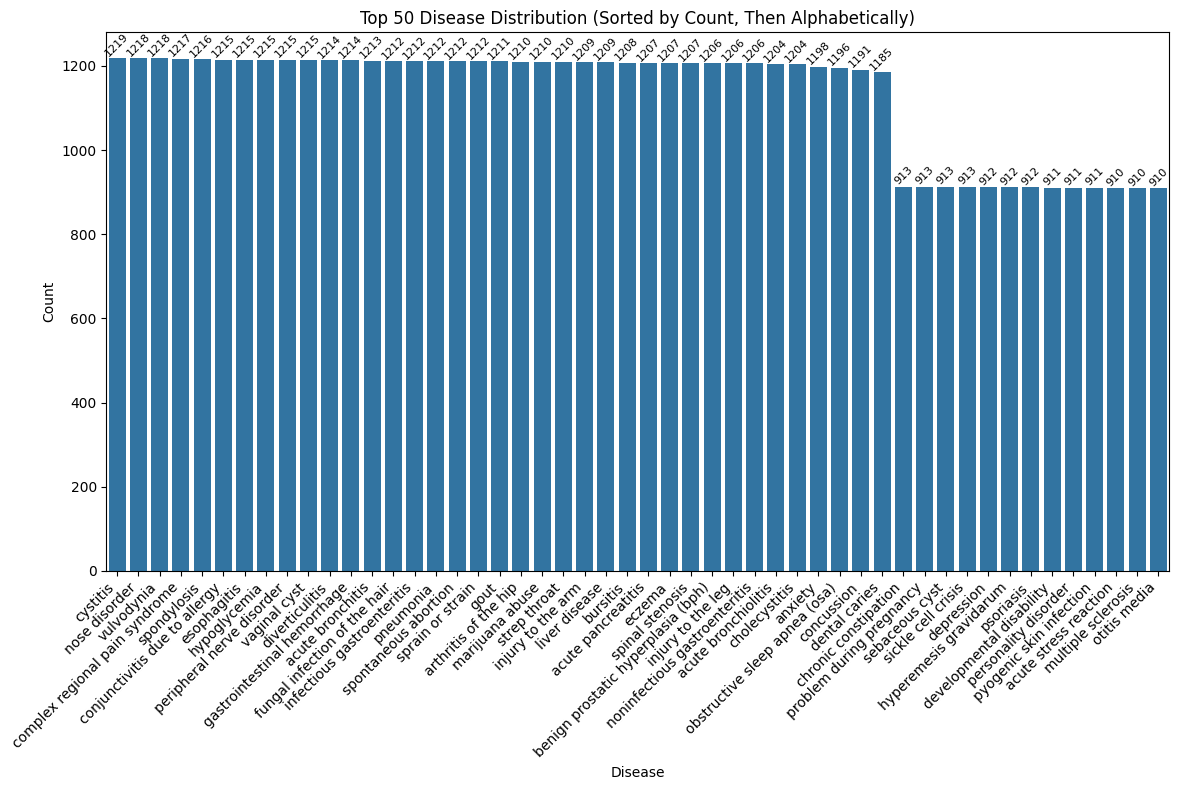

                               Disease  Count
0                             cystitis   1219
1                           vulvodynia   1218
2                        nose disorder   1218
3       complex regional pain syndrome   1217
4                          spondylosis   1216
5                         hypoglycemia   1215
6            peripheral nerve disorder   1215
7                          esophagitis   1215
8                         vaginal cyst   1215
9        conjunctivitis due to allergy   1215
10                      diverticulitis   1214
11         gastrointestinal hemorrhage   1214
12                    acute bronchitis   1213
13                           pneumonia   1212
14        fungal infection of the hair   1212
15          infectious gastroenteritis   1212
16                spontaneous abortion   1212
17                    sprain or strain   1212
18                                gout   1211
19                arthritis of the hip   1210
20                        strep th

In [28]:

# Get disease counts and sort by count (desc), then alphabetically
disease_counts = Org_data['diseases'].value_counts()
sorted_diseases = disease_counts.sort_values(ascending=False).index  # Sort by count
sorted_diseases = sorted_diseases.to_list()
sorted_diseases.sort(key=lambda x: (-disease_counts[x], x))  # Sort ties alphabetically

# Take the top 50 diseases only
top_diseases = sorted_diseases[:50]


plt.figure(figsize=(12, 8))
ax = sns.countplot(x='diseases', data=Org_data, order=top_diseases)

# Add count labels above bars 
for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, rotation=45)

plt.xticks(rotation=45, ha="right")
plt.title("Top 50 Disease Distribution (Sorted by Count, Then Alphabetically)")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

# Get the top 20 diseases sorted by count
top_diseases = disease_counts.nlargest(50)

#Convert the result to a DataFrame for a neat table
top_diseases_df = top_diseases.reset_index()
top_diseases_df.columns = ['Disease', 'Count']  # Rename the columns for clarity

# Print the top diseases as a table
print(top_diseases_df)



<h2>2 Data Cleaning</h2>

<h3> 2.1 Remove classes that have fewer than 5 samples </h3>

In [29]:
# Count the occurrences of each class
class_counts = Org_data['diseases'].value_counts()

# Filter classes with at least 5 samples
valid_classes = class_counts[class_counts >= 5].index

# Create a new DataFrame H_Class by selecting only the valid classes
H_Class_df = Org_data[Org_data['diseases'].isin(valid_classes)]

# Print the new DataFrame class count
print(H_Class_df['diseases'].value_counts())



diseases
cystitis                           1219
nose disorder                      1218
vulvodynia                         1218
complex regional pain syndrome     1217
spondylosis                        1216
                                   ... 
spherocytosis                         5
vitamin a deficiency                  5
friedrich ataxia                      5
cryptorchidism                        5
hyperosmotic hyperketotic state       5
Name: count, Length: 721, dtype: int64


<h3>2.2 Remove duplicate rows</h3>

In [30]:
print("Dataset shape: before cell", H_Class_df.shape)
# Ensure you are working with a copy of the DataFrame to avoid SettingWithCopyWarning
H_Class_df = H_Class_df.copy()

H_Class_df.drop_duplicates(inplace=True)
#print ("57255 rows removed data shpae after removal duplication", data.shape)
No_dup_df=H_Class_df.copy()
print("Dataset shape:after cell", No_dup_df.shape)


Dataset shape: before cell (246823, 378)
Dataset shape:after cell (189568, 378)


<h3>2.3 Data Completion (Handling Missing Values)</h3>
data.fillna(method='ffill', inplace=True)
This modifies the DataFrame in place.
The method 'ffill' (forward fill) fills NaN values using the previous row's value.
Since inplace=True, it does not create a new DataFrame—data is modified directly.
Returns None (because it operates in place).

data = data.ffill()
This creates a new DataFrame with the forward-filled values.
The original data is not modified unless reassigned (data = ...).
This method is preferred when you want to avoid modifying the original DataFrame directly.

In [31]:
print("Dataset shape:before cell", No_dup_df.shape)
##data.fillna(method='ffill', inplace=True)
# Check how many missing values were present before filling
# Calculate the total number of missing values before filling
missing_before = No_dup_df.isnull().sum().sum()
print("Total missing values before filling:", missing_before)

Comp_df = No_dup_df.ffill()
##data.fillna(method='ffill') # if you don't want inplace
print ("data shpae after filling missing values", Comp_df.shape)

Dataset shape:before cell (189568, 378)
Total missing values before filling: 0
data shpae after filling missing values (189568, 378)


<h2> clear memory from temp variable usage for more resources for next phases </h2>

In [32]:
# we keep Org_data and Comp_df we delete all memory used in the process 
del disease_counts
del sorted_diseases
del top_diseases
del top_diseases_df
del ax
del class_counts
del container
del H_Class_df
del No_dup_df
del valid_classes

<h2>2c & 2d. Dimensionality Reduction & Data Balancing</h2>

In [33]:
#later

<h2>2e. Normalization & Feature Engineering</h2>

<h3>2e.1 define target and features coloumns</h3>

In [34]:
# Define the target column correctly
target_col = 'diseases'

# Define feature columns: exclude the target
feature_cols = [col for col in Comp_df .columns if col != target_col]


<h3>2e.2 separate numeric and none numeric cols</h3>

In [35]:
# Identify numeric and non-numeric features in the feature set
numeric_features = Comp_df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
non_numeric_features = [col for col in feature_cols if col not in numeric_features]
print(non_numeric_features)


[]


<h3>2e.3 Encoding Non-Numeric Features</h3>
As observed previously, there are no non-numeric columns in the dataset. However, we have written the code as if there were some.


In [36]:
print("Dataset shape:before cell", Comp_df.shape)

if non_numeric_features:
    for col in non_numeric_features:
        Comp_df[col] = LabelEncoder().fit_transform(Comp_df[col])
    # After encoding, update the list of numeric features (all features are now numeric)
    numeric_features = feature_cols
print("Dataset shape:after cell", Comp_df.shape)


Dataset shape:before cell (189568, 378)
Dataset shape:after cell (189568, 378)


<h3>Apply scaling to the numeric features (actually all)</h3>

In [ ]:
print("Dataset shape:before cell", Comp_df.shape)
scaled_df=Comp_df.copy()
scaler = StandardScaler()
scaled_df[numeric_features] = scaler.fit_transform(scaled_df[numeric_features])
print("Dataset shape:after cell", scaled_df.shape)
#print(scaled_df.describe())
print("Depression before scaling min,max",Comp_df['depression'].min(),Comp_df['depression'].max())
print(f"Depression after scaling (min, max): {scaled_df['depression'].min():.2f}, {scaled_df['depression'].max():.2f}")

Dataset shape:before cell (189568, 378)
Dataset shape:after cell (189568, 378)
depression before scaling min,max 0 1
Depression after scaling (min, max): -0.21, 4.81


<h3>Encode the target variable</h3>

In [38]:

print("Dataset shape:before cell", scaled_df.shape)
scaled_df=scaled_df.copy()
le = LabelEncoder()
scaled_df['disease_encoded'] = le.fit_transform(scaled_df[target_col])
# Defragment the DataFrame
#scaled_df = scaled_df.copy() # this eliminates "PerformanceWarning: DataFrame is highly fragmented)" warning
#from now on our data frame will have the name data
data = scaled_df.copy()
#print(data.head(1000))
print("Dataset shape:after cell", data.shape)


Dataset shape:before cell (189568, 378)
Dataset shape:after cell (189568, 379)


Defragmentation Purpose: If data[target_col] had many categorical values, creating data['disease_encoded'] might lead to fragmented memory. The .copy() forces Pandas to allocate a fresh memory block, which can improve performance for large datasets.
Avoiding Chained Assignment Issues: In Pandas, sometimes setting a new column can create a "view" rather than a full copy. Using .copy() ensures data is a standalone object, avoiding SettingWithCopyWarning.

<h2>Separate features and target</h2>

In [39]:
# Separate features and target
print("Dataset shape:before cell", data.shape)
X = data[feature_cols]
y = data['disease_encoded']
print("Dataset shape:after cell", data.shape)
print("X shape:after cell", X.shape)
print("Dataset shape:after cell", y.shape)



Dataset shape:before cell (189568, 379)
Dataset shape:after cell (189568, 379)
X shape:after cell (189568, 377)
Dataset shape:after cell (189568,)


<h2>Remove classes with fewer than 5 samples to enable stratified splitting</h2>
#Ezra
why do we need to do it in the second time?

In [40]:
# class_counts = y.value_counts()
# rare_classes = class_counts[class_counts < 5].index.tolist()
# if rare_classes:
#     print("Removing classes with fewer than 5 samples:", rare_classes)
#     mask = ~y.isin(rare_classes)
#     X = X[mask]
#     y = y[mask]

<h1>3. Split the Data into Training, Validation, and Test Sets</h1>

<h2> Ezra? </h2>
The code you provided does **not explicitly remove stratification** because stratification is not even applied in the first place. In fact, this code **does not use stratification** at all.
I replaced the code to have 


The code you provided does **not explicitly remove stratification** because stratification is not even applied in the first place. In fact, this code **does not use stratification** at all.

### Explanation:

- **`train_test_split()`** splits the dataset into two parts: training and testing (or validation) datasets.
- **Stratification** is used to ensure that the distribution of target values (class labels) is the same in both the training and test sets as it is in the original dataset.

In this code, you **didn't specify the `stratify` argument**, which means that the split will **not** preserve the class distribution. This is what's happening:

```python
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
```

- The first `train_test_split()` splits `X` and `y` into a training set (`X_train`, `y_train`) and a temporary set (`X_temp`, `y_temp`) without preserving the class distribution.
- The second `train_test_split()` splits the `X_temp` and `y_temp` into validation (`X_val`, `y_val`) and test (`X_test`, `y_test`) sets, again without preserving the class distribution.

### **What Happens If You Add Stratification?**

If you were to **add stratification**, it would look like this:
```python
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
```

In this case:
- `stratify=y` ensures that the class distribution in `y_train` is the same as in `y` before splitting.
- `stratify=y_temp` ensures that the class distribution in `y_val` and `y_test` are the same as in `y_temp`.

### **Conclusion:**
Your code **does not remove stratification**, because it never applies stratification in the first place. If you want stratification, you need to explicitly use the `stratify` argument as shown above. Without it, `train_test_split()` will perform a random split without considering the class distribution.

Let me know if that clears things up! 😄

<h2> # Separate features and target </h2>


In [41]:
X = data[feature_cols]
y = data['disease_encoded']
print(X)
# Corrected: Use the DataFrame column for value_counts()
class_counts = data['diseases'].value_counts()
rare_classes = class_counts[class_counts < 5].index

if len(rare_classes) > 0:
    print("Removing classes with too few samples:", list(rare_classes))
    data = data.loc[~data['diseases'].isin(rare_classes)]

print("Rare classes identified:", len(rare_classes))
print("122 rows removed. Data shape after removal:", data.shape)

# Ezra Option 1: Remove stratification

# Bentzi Option 1: ensure stratification
print(data.shape)
print(X.shape)

        anxiety and nervousness  depression  shortness of breath  \
0                      5.058765   -0.207829             3.261015   
1                     -0.197677   -0.207829             3.261015   
2                      5.058765    4.811639             3.261015   
3                      5.058765   -0.207829            -0.306653   
4                      5.058765    4.811639            -0.306653   
...                         ...         ...                  ...   
246937                -0.197677   -0.207829            -0.306653   
246938                -0.197677   -0.207829            -0.306653   
246941                -0.197677   -0.207829            -0.306653   
246943                -0.197677   -0.207829            -0.306653   
246944                -0.197677   -0.207829            -0.306653   

        depressive or psychotic symptoms  sharp chest pain  dizziness  \
0                               4.004592         -0.327363  -0.267840   
1                               4.004

In [42]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [ ]:
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# # X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# # X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (132697, 377) (132697,)
Validation set: (28435, 377) (28435,)
Test set: (28436, 377) (28436,)


In [ ]:
print("time: end of preparation foe model running:\t",datetime.now().strftime("%H:%M:%S"))

time: end of preparation foe model running:	 08:02:07
08:02:07


In [44]:


# Assuming you have your data in X and y (features and labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution in the training set
class_counts = Counter(y_train)
min_samples = min(class_counts.values())

# Always use cost-sensitive Random Forest, but add a check for extremely low numbers.
if min_samples < 2:
    print("Warning: Extremely small minority class (less than 2 samples).")
    print("Using cost-sensitive Random Forest with adjusted parameters.")
    rf_classifier = RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=100,  # Or adjust as needed.
        max_depth=10,  # Or adjust as needed.
        min_samples_split=2, # Ensure split is possible.
        min_samples_leaf=1, # Ensure leaf is possible.
        max_features='sqrt'
    )
elif min_samples < 5:
    print("Warning: Small minority class (less than 5 samples).")
    print("Using cost-sensitive Random Forest.")
    rf_classifier = RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt'
    )
else:
    print("Using cost-sensitive Random Forest.")
    rf_classifier = RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt'
    )

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
# print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))
#Optional: Print class distribution
print("Train Class Distribution:", Counter(y_train))
print("Test Class Distribution:", Counter(y_test))

Using cost-sensitive Random Forest with adjusted parameters.
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.97      0.79      0.87        48
           2       0.24      0.17      0.20        29
           3       0.00      0.00      0.00         1
           4       0.84      0.62      0.71        34
           5       0.00      0.50      0.01         2
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         4
           8       0.94      0.50      0.65        68
           9       1.00      0.14      0.25       155
          10       1.00      0.22      0.36       232
          11       0.86      0.25      0.39       250
          12       0.72      0.11      0.19       162
          14       0.33      0.07      0.11        29
          15       0.98      0.84      0.90       166
          16       0.55      0.47      0.51       108
          17       1

In [45]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (151654, 377)
Shape of y_train: (151654,)


In [46]:
del non_numeric_features
del missing_before
del rare_classes
del scaled_df

In [47]:

# 1. Analyze class distribution to identify small classes
class_distribution = Counter(y_train)
print("Original class distribution:", class_distribution)

# 2. Identify classes with counts <= 2 (or your chosen threshold)
classes_to_remove = [cls for cls, count in class_distribution.items() if count <= 2]
print("Classes to remove:", classes_to_remove)

# 3. Filter out these classes from X_train and y_train
indices_to_keep = [index for index, label in enumerate(y_train) if label not in classes_to_remove]

# Use .iloc to filter rows by integer index in Pandas DataFrame
X_train_filtered = X_train.iloc[indices_to_keep]
y_train_filtered = pd.Series(y_train).iloc[indices_to_keep].values # Handle potential pandas series for y_train, convert back to numpy array

print("Shape of filtered X_train:", X_train_filtered.shape)
print("Shape of filtered y_train:", y_train_filtered.shape)
print("Class distribution after filtering:", Counter(y_train_filtered))


# 4. Apply SMOTE on the filtered data with k_neighbors=1 (or a suitable value)
sm = SMOTE(random_state=42, k_neighbors=1) # or k_neighbors=2 or 3 if you want to try higher
X_train_bal, y_train_bal = sm.fit_resample(X_train_filtered, y_train_filtered)
print("Balanced training set class distribution after SMOTE:", Counter(y_train_bal))

Original class distribution: Counter({522: 1006, 502: 989, 49: 989, 159: 988, 622: 985, 623: 982, 346: 982, 328: 979, 185: 979, 91: 978, 690: 976, 412: 975, 10: 972, 714: 971, 627: 971, 279: 970, 449: 968, 271: 966, 358: 966, 140: 963, 17: 963, 398: 963, 204: 963, 11: 963, 451: 962, 618: 962, 71: 961, 222: 961, 134: 960, 133: 958, 110: 957, 453: 957, 262: 950, 166: 943, 42: 940, 352: 939, 624: 937, 169: 691, 145: 686, 631: 679, 335: 678, 598: 677, 554: 677, 283: 673, 300: 672, 143: 671, 588: 666, 650: 665, 478: 665, 139: 665, 605: 664, 303: 663, 167: 663, 116: 663, 199: 662, 83: 661, 40: 660, 595: 660, 19: 658, 693: 658, 53: 658, 507: 657, 432: 657, 593: 657, 115: 657, 610: 656, 132: 656, 20: 656, 447: 655, 572: 654, 266: 654, 484: 653, 9: 653, 496: 652, 305: 652, 121: 651, 12: 650, 604: 649, 151: 649, 361: 648, 289: 648, 224: 648, 292: 647, 407: 647, 96: 646, 194: 645, 560: 643, 15: 642, 337: 642, 318: 641, 339: 640, 575: 640, 175: 640, 163: 640, 472: 638, 488: 636, 377: 635, 28: 634,

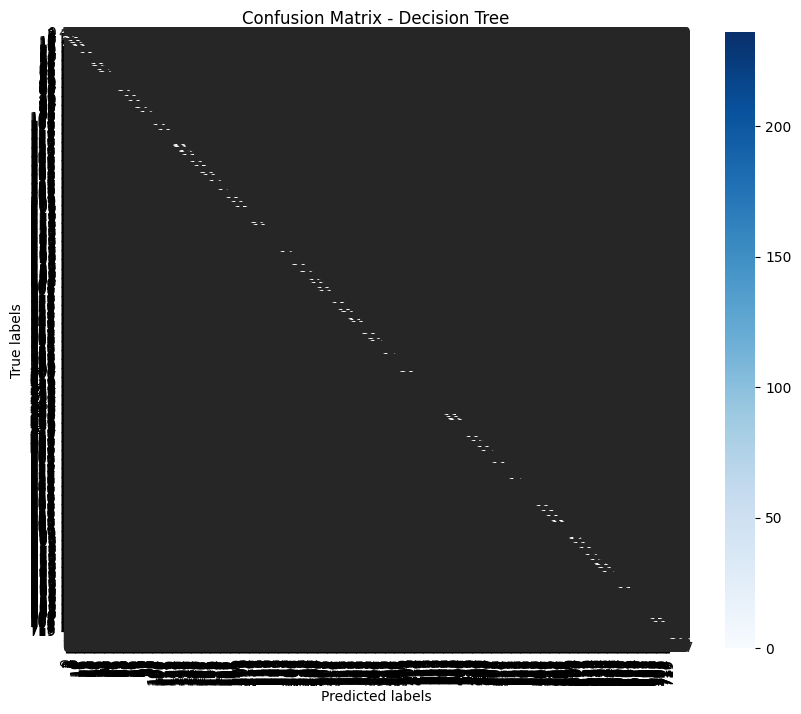

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(list(set(y_test))), # Ensure labels are sorted and cover all classes in y_test
            yticklabels=sorted(list(set(y_test))))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [49]:
dt_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced') # Added class_weight='balanced'
dt_clf.fit(X_train_bal, y_train_bal)
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the baseline model (and generate confusion matrix again)
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='weighted') # Warnings might be gone or reduced
recall_dt = recall_score(y_test, y_pred_dt, average='weighted') # Warnings might be gone or reduced
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Performance (with class_weight='balanced'):")
print(f"Accuracy: {acc_dt:.4f}, Precision: {prec_dt:.4f}, Recall: {recall_dt:.4f}, F1-score: {f1_dt:.4f}")


Decision Tree Performance (with class_weight='balanced'):
Accuracy: 0.7233, Precision: 0.7368, Recall: 0.7233, F1-score: 0.7258


c:\Users\Bentzii\pyfirst\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Bentzii\pyfirst\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


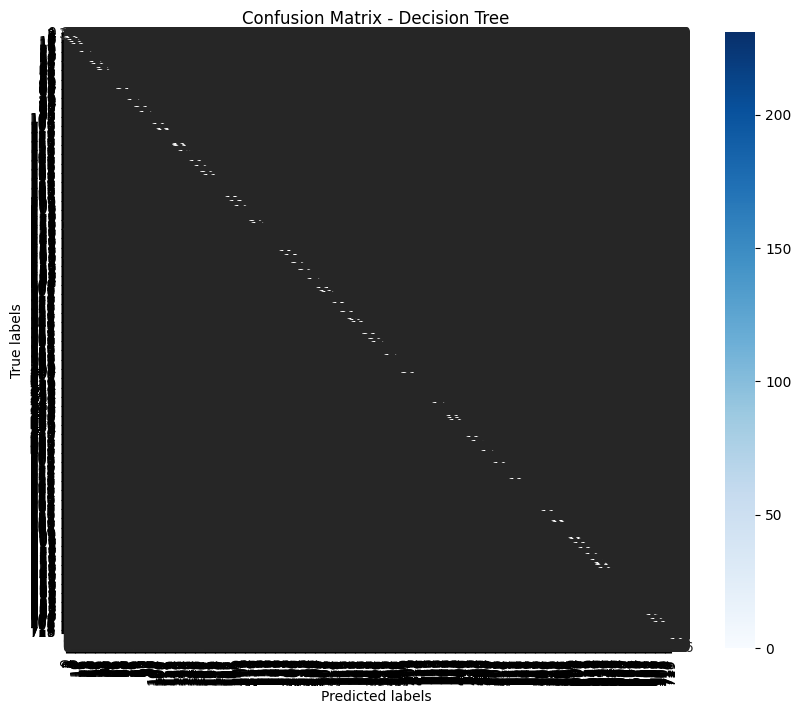

In [50]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(list(set(y_test))), # Ensure labels are sorted
            yticklabels=sorted(list(set(y_test))))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [51]:
# ## 5. Baseline Model: Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_bal, y_train_bal)
#dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)

# Evaluate the baseline model
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='weighted',zero_division=np.nan)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted',zero_division=np.nan)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Performance:")
print(f"Accuracy: {acc_dt:.4f}, Precision: {prec_dt:.4f}, Recall: {recall_dt:.4f}, F1-score: {f1_dt:.4f}")


Decision Tree Performance:
Accuracy: 0.7233, Precision: 0.7381, Recall: 0.7233, F1-score: 0.7258


In [52]:

# Baseline Model: Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_bal, y_train_bal)
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the baseline model with zero_division parameter set
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted', zero_division=0)

print("Decision Tree Performance:")
print(f"Accuracy: {acc_dt:.4f}, Precision: {prec_dt:.4f}, Recall: {recall_dt:.4f}, F1-score: {f1_dt:.4f}")


Decision Tree Performance:
Accuracy: 0.7233, Precision: 0.7368, Recall: 0.7233, F1-score: 0.7258


In [53]:
### gemini upgrade: 
# ## 5. Baseline Model: Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_bal, y_train_bal)
#dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)

# Evaluate the baseline model, setting zero_division=0
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0) # Added zero_division=0
recall_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=0) # Added zero_division=0
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Performance:")
print(f"Accuracy: {acc_dt:.4f}, Precision: {prec_dt:.4f}, Recall: {recall_dt:.4f}, F1-score: {f1_dt:.4f}")

Decision Tree Performance:
Accuracy: 0.7233, Precision: 0.7368, Recall: 0.7233, F1-score: 0.7258


In [54]:
print("Predicted class distribution (y_pred_dt):", Counter(y_pred_dt))

Predicted class distribution (y_pred_dt): Counter({11: 271, 71: 266, 166: 265, 133: 264, 17: 263, 110: 262, 185: 259, 624: 256, 159: 255, 204: 253, 222: 248, 140: 247, 10: 246, 352: 246, 451: 246, 262: 245, 279: 245, 91: 245, 412: 239, 49: 235, 134: 233, 271: 233, 42: 233, 622: 232, 623: 229, 358: 229, 346: 228, 453: 228, 328: 223, 714: 221, 398: 221, 502: 220, 47: 218, 690: 218, 627: 214, 78: 214, 449: 207, 522: 205, 9: 204, 618: 204, 83: 197, 15: 194, 385: 194, 167: 189, 163: 185, 40: 184, 116: 182, 594: 180, 96: 180, 194: 178, 73: 177, 318: 177, 303: 177, 28: 177, 20: 175, 19: 173, 337: 173, 560: 172, 596: 171, 292: 171, 683: 171, 12: 170, 143: 170, 256: 170, 432: 168, 477: 168, 224: 168, 572: 167, 611: 167, 335: 165, 199: 165, 151: 164, 488: 164, 377: 163, 175: 163, 305: 163, 325: 163, 53: 163, 139: 160, 339: 160, 650: 159, 289: 158, 361: 157, 115: 156, 496: 155, 565: 155, 554: 155, 562: 155, 693: 154, 132: 153, 266: 152, 507: 152, 472: 151, 595: 150, 575: 146, 121: 145, 631: 144, 

In [55]:
# ## 6. Neural Network with Default Hyperparameters

# Define a simple MLP model
model = Sequential([
    Input(shape=(X_train_bal.shape[1],)), # Use Input layer to define input shape
    Dense(64, activation='relu'), # Remove input_shape from Dense layer
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train the model with early stopping (rest of your training code remains the same)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_bal, y_train_bal,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop],
                    verbose=1)

# Evaluate on test set (rest of your evaluation code remains the same)
nn_loss, nn_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Neural Network Test Accuracy: {:.4f}".format(nn_accuracy))

Epoch 1/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.6779 - loss: 1.3746 - val_accuracy: 0.8023 - val_loss: 0.6202
Epoch 2/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.8456 - loss: 0.5129 - val_accuracy: 0.8140 - val_loss: 0.5946
Epoch 3/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.8598 - loss: 0.4580 - val_accuracy: 0.8200 - val_loss: 0.6016
Epoch 4/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.8665 - loss: 0.4347 - val_accuracy: 0.8165 - val_loss: 0.5946
Epoch 5/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.8728 - loss: 0.4142 - val_accuracy: 0.8241 - val_loss: 0.5580
Epoch 6/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.8752 - loss: 0.4055 - val_accuracy: 0.8256 - val_loss: 0.5549
Epoch 7/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.8779 - loss: 0.3960 - val_accuracy: 0.8258 - val_loss: 0.5660
Epoch 8/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 

In [56]:
# ## 7. Compare Baseline and Neural Network Metrics
print("Baseline (Decision Tree) Accuracy:", acc_dt)
print("Neural Network Accuracy:", nn_accuracy)
# (Other metrics can be compared similarly)

Baseline (Decision Tree) Accuracy: 0.7232684496492061
Neural Network Accuracy: 0.8148704767227173


In [57]:

# ## 8. Hyperparameter Tuning for Neural Network
# Tune 3 hyperparameters: learning rate, batch size, and number of epochs.
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
epoch_list = [30, 50, 70]

results = {}
for lr in learning_rates:
    for batch in batch_sizes:
        for epochs in epoch_list:
            tf.keras.backend.clear_session()
            
            # Define model using an Input layer
            inputs = tf.keras.Input(shape=(X_train_bal.shape[1],))
            x = Dense(64, activation='relu')(inputs)
            x = Dropout(0.2)(x)
            x = Dense(32, activation='relu')(x)
            outputs = Dense(len(le.classes_), activation='softmax')(x)
            model_tune = tf.keras.Model(inputs, outputs)
            
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
            model_tune.compile(optimizer=optimizer,
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])
            
            history_tune = model_tune.fit(X_train_bal, y_train_bal,
                                          epochs=epochs,
                                          batch_size=batch,
                                          validation_data=(X_val, y_val),
                                          callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
                                          verbose=0)
            test_loss, test_acc = model_tune.evaluate(X_test, y_test, verbose=0)
            results[(lr, batch, epochs)] = test_acc
            print(f"LR: {lr}, Batch: {batch}, Epochs: {epochs} => Test Accuracy: {test_acc:.4f}")

best_params = max(results, key=results.get)
print("Best hyperparameters (learning rate, batch size, epochs):", best_params, "with accuracy:", results[best_params])




LR: 0.001, Batch: 16, Epochs: 30 => Test Accuracy: 0.8076
LR: 0.001, Batch: 16, Epochs: 50 => Test Accuracy: 0.8068
LR: 0.001, Batch: 16, Epochs: 70 => Test Accuracy: 0.8030
LR: 0.001, Batch: 32, Epochs: 30 => Test Accuracy: 0.8153
LR: 0.001, Batch: 32, Epochs: 50 => Test Accuracy: 0.8134
LR: 0.001, Batch: 32, Epochs: 70 => Test Accuracy: 0.8118
LR: 0.001, Batch: 64, Epochs: 30 => Test Accuracy: 0.8180
LR: 0.001, Batch: 64, Epochs: 50 => Test Accuracy: 0.8162
LR: 0.001, Batch: 64, Epochs: 70 => Test Accuracy: 0.8193
LR: 0.01, Batch: 16, Epochs: 30 => Test Accuracy: 0.0443
LR: 0.01, Batch: 16, Epochs: 50 => Test Accuracy: 0.0577
LR: 0.01, Batch: 16, Epochs: 70 => Test Accuracy: 0.0600
LR: 0.01, Batch: 32, Epochs: 30 => Test Accuracy: 0.3615
LR: 0.01, Batch: 32, Epochs: 50 => Test Accuracy: 0.4026
LR: 0.01, Batch: 32, Epochs: 70 => Test Accuracy: 0.3683
LR: 0.01, Batch: 64, Epochs: 30 => Test Accuracy: 0.6026
LR: 0.01, Batch: 64, Epochs: 50 => Test Accuracy: 0.6255
LR: 0.01, Batch: 64, 

In [58]:
# #ed grid for quicker tuning (less parameter to test the section above faster)
# learning_rates = [0.001, 0.01]       # reduced to 2 values
# batch_sizes = [32, 64]               # reduced to 2 values
# epoch_list = [20, 30]                # reduced to 2 values

# results = {}
# for lr in learning_rates:
#     for batch in batch_sizes:
#         for epochs in epoch_list:
#             tf.keras.backend.clear_session()
            
#             # Define model using an Input layer
#             inputs = tf.keras.Input(shape=(X_train_bal.shape[1],))
#             x = Dense(64, activation='relu')(inputs)
#             x = Dropout(0.2)(x)
#             x = Dense(32, activation='relu')(x)
#             outputs = Dense(len(le.classes_), activation='softmax')(x)
#             model_tune = tf.keras.Model(inputs, outputs)
            
#             optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
#             model_tune.compile(optimizer=optimizer,
#                                loss='sparse_categorical_crossentropy',
#                                metrics=['accuracy'])
            
#             # Use early stopping to terminate unpromising runs quickly
#             history_tune = model_tune.fit(X_train_bal, y_train_bal,
#                                           epochs=epochs,
#                                           batch_size=batch,
#                                           validation_data=(X_val, y_val),
#                                           callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
#                                           verbose=0)
#             test_loss, test_acc = model_tune.evaluate(X_test, y_test, verbose=0)
#             results[(lr, batch, epochs)] = test_acc
#             print(f"LR: {lr}, Batch: {batch}, Epochs: {epochs} => Test Accuracy: {test_acc:.4f}")

# best_params = max(results, key=results.get)
# print("Best hyperparameters (learning rate, batch size, epochs):", best_params, "with accuracy:", results[best_params])

Original dataset shape (before dummy encoding): (189409, 379)
Non-numeric columns identified: ['diseases']
DEBUG: non_numeric_columns just before get_dummies: ['diseases']
Shape after one-hot encoding: (189409, 1035)


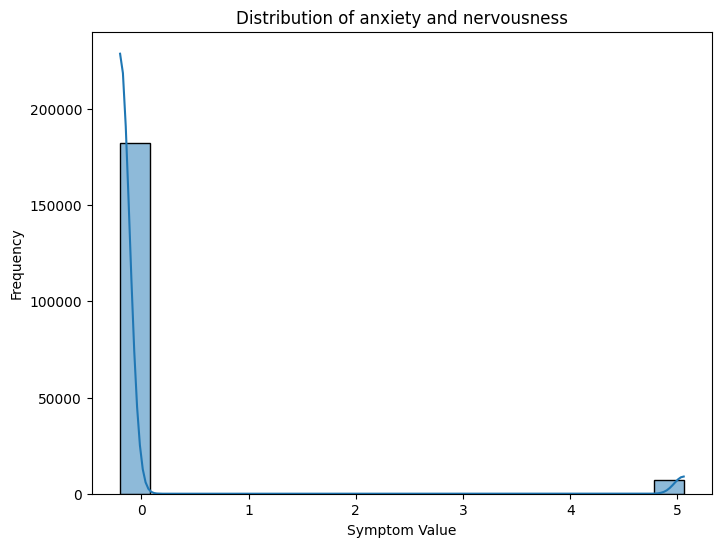


Descriptive Statistics for column 'anxiety and nervousness':
count    189409.000000
mean         -0.000167
std           0.999596
min          -0.197677
25%          -0.197677
50%          -0.197677
75%          -0.197677
max           5.058765
Name: anxiety and nervousness, dtype: float64
--------------------------------------------------


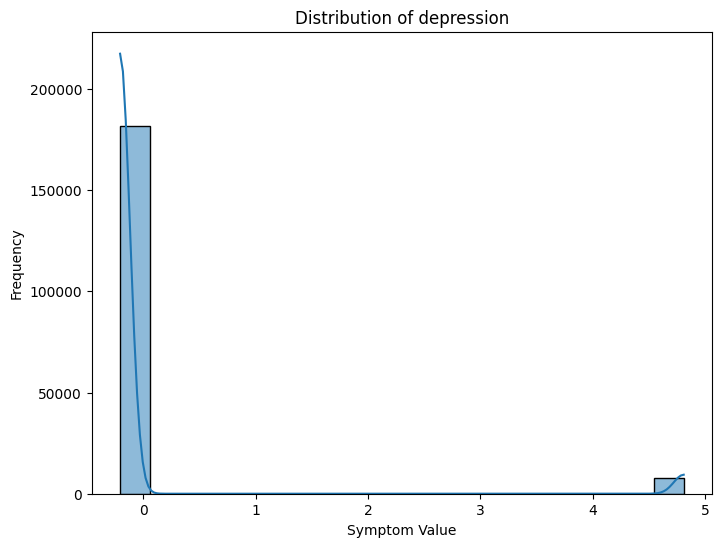


Descriptive Statistics for column 'depression':
count    189409.000000
mean          0.000015
std           1.000038
min          -0.207829
25%          -0.207829
50%          -0.207829
75%          -0.207829
max           4.811639
Name: depression, dtype: float64
--------------------------------------------------


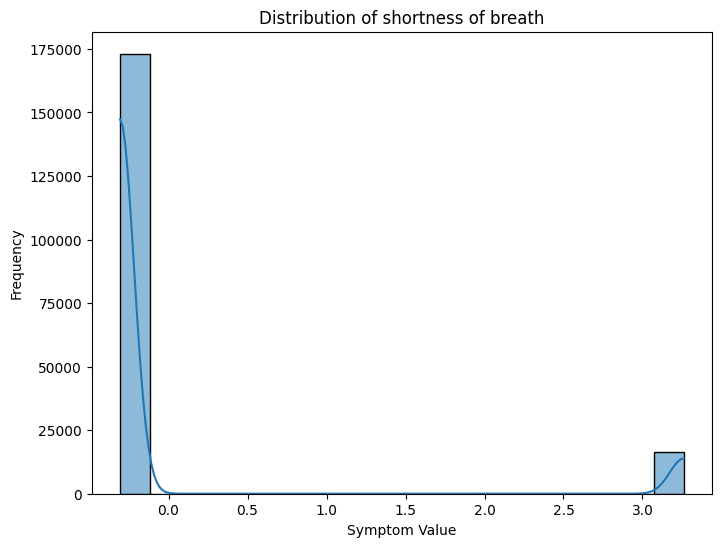


Descriptive Statistics for column 'shortness of breath':
count    189409.000000
mean          0.000126
std           1.000188
min          -0.306653
25%          -0.306653
50%          -0.306653
75%          -0.306653
max           3.261015
Name: shortness of breath, dtype: float64
--------------------------------------------------


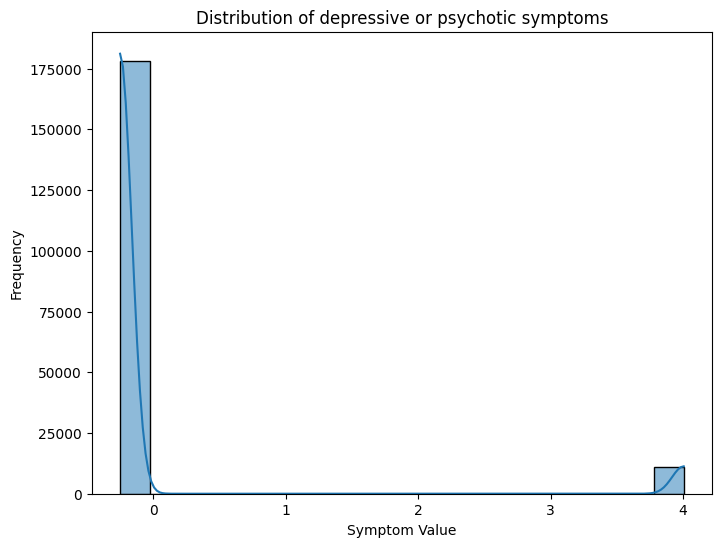


Descriptive Statistics for column 'depressive or psychotic symptoms':
count    189409.000000
mean         -0.000352
std           0.999342
min          -0.249713
25%          -0.249713
50%          -0.249713
75%          -0.249713
max           4.004592
Name: depressive or psychotic symptoms, dtype: float64
--------------------------------------------------

Applying frequency-based symptom selection...
Available disease dummy columns: ['diseases_abdominal hernia', 'diseases_abscess of nose', 'diseases_abscess of the lung', 'diseases_abscess of the pharynx', 'diseases_acanthosis nigricans', 'diseases_acariasis', 'diseases_achalasia', 'diseases_acne', 'diseases_actinic keratosis', 'diseases_acute bronchiolitis', 'diseases_acute bronchitis', 'diseases_acute bronchospasm', 'diseases_acute glaucoma', 'diseases_acute kidney injury', 'diseases_acute otitis media', 'diseases_acute pancreatitis', 'diseases_acute respiratory distress syndrome (ards)', 'diseases_acute sinusitis', 'diseases_acut

In [59]:
# ## 9. Dataset Modification for Performance Improvement


# 1. Load Dataset
# data = pd.read_csv("Final_Augmented_dataset_Diseases_and_Symptoms.csv")
# 2. Create a copy for processing
data_processed = data.copy()

print("Original dataset shape (before dummy encoding):", data_processed.shape)

# 3. Identify and Convert Non-Numeric Columns to Dummy Variables
non_numeric_columns = data_processed.select_dtypes(exclude=['number']).columns.tolist()
print(f"Non-numeric columns identified: {non_numeric_columns}")

# *** DEBUG PRINT - Check non_numeric_columns just before get_dummies ***
print(f"DEBUG: non_numeric_columns just before get_dummies: {non_numeric_columns}")

# Apply one-hot encoding; drop_first=True drops the first category for each non-numeric column
data_processed = pd.get_dummies(data_processed, columns=non_numeric_columns, drop_first=True)
print("Shape after one-hot encoding:", data_processed.shape)

# Data Distribution Analysis (for selected symptom columns)
symptom_columns_to_analyze = ['anxiety and nervousness', 'depression', 'shortness of breath', 'depressive or psychotic symptoms']

for column in symptom_columns_to_analyze:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_processed[column], kde=True)  # Histogram with KDE
    plt.title(f'Distribution of {column}')
    plt.xlabel('Symptom Value')
    plt.ylabel('Frequency')
    plt.show()

    print(f"\nDescriptive Statistics for column '{column}':")
    print(data_processed[column].describe())
    print("-" * 50)

# 5. Frequency-Based Symptom Selection (with debugging)
print("\nApplying frequency-based symptom selection...")

# Assuming the first column (after dummy encoding) is the dummy for 'diseases'
# but to be sure, we identify all columns starting with 'diseases_'
disease_dummy_columns = [col for col in data_processed.columns if col.startswith('diseases_')]
print("Available disease dummy columns:", disease_dummy_columns)

# Choose a specific disease column if available; here we try to use 'diseases_Acne'
if 'diseases_Acne' in disease_dummy_columns:
    disease_column_name = 'diseases_Acne'
else:
    # If 'diseases_Acne' isn't present, choose the first available dummy column
    if disease_dummy_columns:
        disease_column_name = disease_dummy_columns[0]
    else:
        raise KeyError("No disease dummy columns found.")

# Debug print for disease column name
print(f"\nDEBUG: disease_column_name: '{disease_column_name}'")
print(f"DEBUG: Type of disease_column_name: {type(disease_column_name)}")
print("-" * 50)

# Select symptom columns based on frequency threshold
symptom_columns = data_processed.columns.drop(disease_dummy_columns)  # All columns except disease dummies
symptom_frequencies = data_processed[symptom_columns].mean()  # Calculate frequency of each symptom
frequency_threshold = 0.05  # Keep symptoms present in at least 5% of the dataset
symptoms_to_keep = symptom_frequencies[symptom_frequencies >= frequency_threshold].index.tolist()

# *** DEBUG: Print column names of data_processed BEFORE column selection (and their type) ***
print("\nDEBUG: Column names in data_processed BEFORE column selection:")
print(data_processed.columns.tolist())
print(f"DEBUG: Type of data_processed.columns: {type(data_processed.columns)}")
print("-" * 50)

# Columns to keep: selected disease dummy + selected symptom columns
columns_to_keep = [disease_column_name] + symptoms_to_keep

# *** DEBUG: Print columns_to_keep just before filtering (and type) ***
print("\nDEBUG: Columns to keep (columns_to_keep):")
print(columns_to_keep)
print(f"DEBUG: Type of columns_to_keep: {type(columns_to_keep)}")
print("-" * 50)

# *** DEBUG: Check if disease_column_name is actually IN data_processed.columns ***
is_disease_col_in_columns = disease_column_name in data_processed.columns
print(f"\nDEBUG: Is '{disease_column_name}' in data_processed.columns? : {is_disease_col_in_columns}")
print("-" * 50)

# Filter the DataFrame to keep only the desired columns
data_processed_frequency_filtered = data_processed[columns_to_keep]

print("Shape after frequency-based symptom selection:", data_processed_frequency_filtered.shape)
print("\nSymptoms kept (based on frequency):")
print(symptoms_to_keep)


In [60]:
# ## 10. Dataset Modification for Performance Degradation
# Example: Randomly remove a significant portion of the data (simulate data loss)
data_degraded = data.sample(frac=0.5, random_state=42)
print("Degraded dataset shape:", data_degraded.shape)

# --- Preprocessing for the degraded dataset ---
# 1. Create a copy for processing
data_degraded_processed = data_degraded.copy()

# 2. One-Hot Encode non-numeric columns (using drop_first to avoid collinearity)
non_numeric_columns = data_degraded_processed.select_dtypes(exclude=['number']).columns.tolist()
print(f"Non-numeric columns in degraded data: {non_numeric_columns}")

data_degraded_processed = pd.get_dummies(data_degraded_processed, columns=non_numeric_columns, drop_first=True)
print("Shape after one-hot encoding (degraded):", data_degraded_processed.shape)

# 3. Frequency-Based Symptom Selection
# Identify dummy columns created for the 'diseases' column
disease_dummy_columns = [col for col in data_degraded_processed.columns if col.startswith('diseases_')]
print("Available disease dummy columns in degraded data:", disease_dummy_columns)

# Choose a disease dummy column; here we attempt 'diseases_Acne', or use the first one available.
if 'diseases_Acne' in disease_dummy_columns:
    disease_column_name = 'diseases_Acne'
elif disease_dummy_columns:
    disease_column_name = disease_dummy_columns[0]
else:
    raise KeyError("No disease dummy columns found in degraded data.")

print(f"Selected disease column: '{disease_column_name}'")

# Calculate symptom frequencies (exclude disease dummy columns)
symptom_columns = data_degraded_processed.columns.drop(disease_dummy_columns)
symptom_frequencies = data_degraded_processed[symptom_columns].mean()
frequency_threshold = 0.05  # Keep symptoms present in at least 5% of the dataset
symptoms_to_keep = symptom_frequencies[symptom_frequencies >= frequency_threshold].index.tolist()

# Define columns to keep: the selected disease column plus the high-frequency symptom columns
columns_to_keep = [disease_column_name] + symptoms_to_keep
print("Columns to keep in degraded data:", columns_to_keep)

# Filter the processed DataFrame
data_degraded_filtered = data_degraded_processed[columns_to_keep]
print("Shape after frequency-based symptom selection (degraded):", data_degraded_filtered.shape)

# 4. Prepare Features and Labels
X_degraded = data_degraded_filtered.drop(columns=[disease_column_name])
y_degraded = data_degraded_filtered[disease_column_name]

# 5. Split the Degraded Dataset into Training and Test Sets
X_train_deg, X_test_deg, y_train_deg, y_test_deg = train_test_split(
    X_degraded, y_degraded, test_size=0.2, random_state=42
)
print("Degraded training set shape:", X_train_deg.shape)
print("Degraded test set shape:", X_test_deg.shape)

# 6. Balance the Training Set using SMOTE
# Adjust k_neighbors based on the minority class size if necessary.
sm = SMOTE(random_state=42, k_neighbors=1)
X_train_deg_bal, y_train_deg_bal = sm.fit_resample(X_train_deg, y_train_deg)
print("Balanced degraded training set class distribution:", Counter(y_train_deg_bal))

# 7. Train a Cost-Sensitive Random Forest on the Degraded Dataset
rf_classifier_deg = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt'
)
rf_classifier_deg.fit(X_train_deg_bal, y_train_deg_bal)

# 8. Evaluate the Model on the Degraded Test Set
y_pred_deg = rf_classifier_deg.predict(X_test_deg)
print("Classification report on degraded data:")
print(classification_report(y_test_deg, y_pred_deg))


Degraded dataset shape: (94704, 379)
Non-numeric columns in degraded data: ['diseases']
Shape after one-hot encoding (degraded): (94704, 1034)
Available disease dummy columns in degraded data: ['diseases_abdominal hernia', 'diseases_abscess of nose', 'diseases_abscess of the pharynx', 'diseases_acanthosis nigricans', 'diseases_acariasis', 'diseases_achalasia', 'diseases_acne', 'diseases_actinic keratosis', 'diseases_acute bronchiolitis', 'diseases_acute bronchitis', 'diseases_acute bronchospasm', 'diseases_acute glaucoma', 'diseases_acute kidney injury', 'diseases_acute otitis media', 'diseases_acute pancreatitis', 'diseases_acute respiratory distress syndrome (ards)', 'diseases_acute sinusitis', 'diseases_acute stress reaction', 'diseases_adhesive capsulitis of the shoulder', 'diseases_adjustment reaction', 'diseases_adrenal adenoma', 'diseases_alcohol abuse', 'diseases_alcohol intoxication', 'diseases_alcohol withdrawal', 'diseases_alcoholic liver disease', 'diseases_allergy', 'disea

In [61]:
# ## 11. Network Architecture Enhancement
# Enhanced model: adding extra layers and batch normalization for improved convergence

# --- Assume you already have your processed training, validation, and test datasets ---
# X_train_bal, y_train_bal, X_val, y_val, X_test, y_test are defined
# Also assume your LabelEncoder 'le' is already fitted with the classes

# Define the enhanced neural network model with an explicit Input layer
model_enhanced = Sequential([
    Input(shape=(X_train_bal.shape[1],)),  # Define the input shape
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')  # Output layer with number of classes
])

# Compile the model
model_enhanced.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model with early stopping callback
history_enhanced = model_enhanced.fit(
    X_train_bal, y_train_bal,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# Evaluate the enhanced model on the test set
enhanced_loss, enhanced_accuracy = model_enhanced.evaluate(X_test, y_test, verbose=0)
print("Enhanced Neural Network Test Accuracy:", enhanced_accuracy)


Epoch 1/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - accuracy: 0.5496 - loss: 1.9785 - val_accuracy: 0.7942 - val_loss: 0.6539
Epoch 2/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.7934 - loss: 0.7074 - val_accuracy: 0.8098 - val_loss: 0.6070
Epoch 3/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.8217 - loss: 0.6025 - val_accuracy: 0.8171 - val_loss: 0.5791
Epoch 4/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.8355 - loss: 0.5508 - val_accuracy: 0.8221 - val_loss: 0.5665
Epoch 5/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - accuracy: 0.8440 - loss: 0.5217 - val_accuracy: 0.8242 - val_loss: 0.5452
Epoch 6/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - accuracy: 0.8503 - loss: 0.5015 - val_accuracy: 0.8275 - val_loss: 0.5413
Epoch 7/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.8523 - loss: 0.4931 - val_accuracy: 0.8260 - val_loss: 0.5367
Epoch 8/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - accuracy: 

Epoch 1/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 188s 9ms/step - accuracy: 0.6738 - auc: 0.8978 - loss: 1.3984 - val_accuracy: 0.7981 - val_auc: 0.8778 - val_loss: 0.6616
Epoch 2/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 187s 9ms/step - accuracy: 0.8450 - auc: 0.9312 - loss: 0.5135 - val_accuracy: 0.8102 - val_auc: 0.8779 - val_loss: 0.6171
Epoch 3/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 179s 8ms/step - accuracy: 0.8593 - auc: 0.9317 - loss: 0.4618 - val_accuracy: 0.8164 - val_auc: 0.8770 - val_loss: 0.5939
Epoch 4/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 168s 8ms/step - accuracy: 0.8669 - auc: 0.9319 - loss: 0.4348 - val_accuracy: 0.8193 - val_auc: 0.8772 - val_loss: 0.5890
Epoch 5/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 167s 8ms/step - accuracy: 0.8719 - auc: 0.9322 - loss: 0.4179 - val_accuracy: 0.8215 - val_auc: 0.8743 - val_loss: 0.5861
Epoch 6/50
21252/21252 ━━━━━━━━━━━━━━━━━━━━ 165s 8ms/step - accuracy: 0.8753 - auc: 0.9325 - loss: 0.4047 - val_accuracy: 0.8212 - val_auc: 0.8754 - val_loss: 0.5840
Epoc

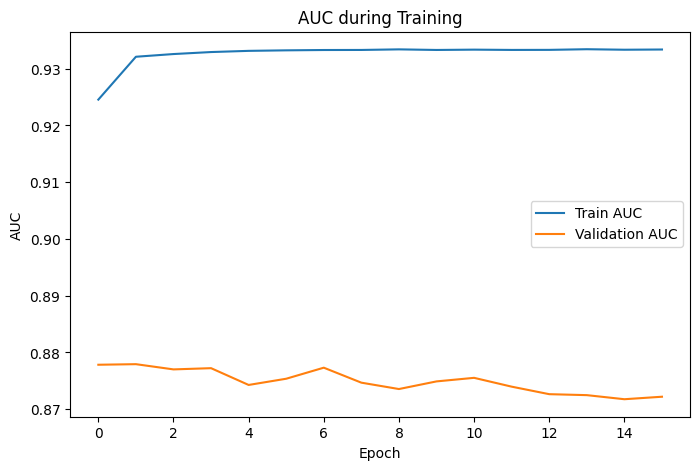

In [62]:
# 12. Propose a New Metric: Adding AUC (Area Under the Curve) 

# Assume that X_train_bal, y_train_bal, X_val, y_val, X_test, y_test are already defined,
# and that you have a fitted LabelEncoder 'le' so that the number of classes is:
num_classes = len(le.classes_)

# Convert labels to one-hot encoding for multi-class AUC computation
y_train_bal_cat = to_categorical(y_train_bal, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Define the model using an explicit Input layer to avoid the input_shape warning.
model_auc = Sequential([
    Input(shape=(X_train_bal.shape[1],)),  # Explicit input layer
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# When using multi-class outputs, set loss to 'categorical_crossentropy' and
# configure the AUC metric for multi-label mode.
model_auc.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc', multi_label=True)]
)

# Train the model using one-hot encoded labels.
history_auc = model_auc.fit(
    X_train_bal, y_train_bal_cat,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val_cat),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# Evaluate the model on the test set.
test_loss, test_accuracy, test_auc = model_auc.evaluate(X_test, y_test_cat, verbose=0)
print("Enhanced Neural Network Test Accuracy:", test_accuracy)
print("Enhanced Neural Network Test AUC:", test_auc)

# Plot the AUC over epochs.
plt.figure(figsize=(8,5))
plt.plot(history_auc.history['auc'], label='Train AUC')
plt.plot(history_auc.history['val_auc'], label='Validation AUC')
plt.title("AUC during Training")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.show()

In [63]:
## 13. Experimenting with Data Imbalance
# For demonstration, simulate different imbalance levels by artificially undersampling the majority class.
def create_imbalance(X, y, majority_frac):
    # majority_frac: fraction of majority class to retain (e.g., 1.0, 0.7, 0.4)
    df = pd.concat([X, y], axis=1)
    majority_class = y.mode()[0]
    df_majority = df[df['disease_encoded'] == majority_class]
    df_minority = df[df['disease_encoded'] != majority_class]
    
    df_majority_under = df_majority.sample(frac=majority_frac, random_state=42)
    df_imbalanced = pd.concat([df_majority_under, df_minority])
    X_imb = df_imbalanced.drop('disease_encoded', axis=1)
    y_imb = df_imbalanced['disease_encoded']
    return X_imb, y_imb

imbalance_levels = [1.0, 0.7, 0.4]
for frac in imbalance_levels:
    X_imb, y_imb = create_imbalance(X_train, pd.Series(y_train, name='disease_encoded'), frac)
    print(f"\nImbalance level (majority fraction={frac}): {Counter(y_imb)}")
    # Optionally, train a model on X_imb, y_imb and evaluate performance.



Imbalance level (majority fraction=1.0): Counter({522: 1006, 502: 989, 49: 989, 159: 988, 622: 985, 623: 982, 346: 982, 328: 979, 185: 979, 91: 978, 690: 976, 412: 975, 10: 972, 714: 971, 627: 971, 279: 970, 449: 968, 271: 966, 358: 966, 140: 963, 17: 963, 398: 963, 204: 963, 11: 963, 451: 962, 618: 962, 71: 961, 222: 961, 134: 960, 133: 958, 110: 957, 453: 957, 262: 950, 166: 943, 42: 940, 352: 939, 624: 937, 169: 691, 145: 686, 631: 679, 335: 678, 598: 677, 554: 677, 283: 673, 300: 672, 143: 671, 588: 666, 650: 665, 478: 665, 139: 665, 605: 664, 303: 663, 167: 663, 116: 663, 199: 662, 83: 661, 40: 660, 595: 660, 19: 658, 693: 658, 53: 658, 507: 657, 432: 657, 593: 657, 115: 657, 610: 656, 132: 656, 20: 656, 447: 655, 572: 654, 266: 654, 484: 653, 9: 653, 496: 652, 305: 652, 121: 651, 12: 650, 604: 649, 151: 649, 361: 648, 289: 648, 224: 648, 292: 647, 407: 647, 96: 646, 194: 645, 560: 643, 15: 642, 337: 642, 318: 641, 339: 640, 575: 640, 175: 640, 163: 640, 472: 638, 488: 636, 377: 

In [64]:
# ## 14. Dimensionality Reduction: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print("Original feature shape:", X_train.shape)
print("Reduced feature shape:", X_train_pca.shape)

# Train a Decision Tree on the PCA-reduced data as an example
dt_clf_pca = DecisionTreeClassifier(random_state=42)
dt_clf_pca.fit(X_train_pca, y_train)
y_pred_dt_pca = dt_clf_pca.predict(X_test_pca)
acc_dt_pca = accuracy_score(y_test, y_pred_dt_pca)
print("Decision Tree Accuracy on PCA-reduced data:", acc_dt_pca)


Original feature shape: (151654, 377)
Reduced feature shape: (151654, 291)
Decision Tree Accuracy on PCA-reduced data: 0.7001107770216807
